In [1]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import matplotlib.pylab as plt
import numpy as np

In [4]:
IMAGE_SIZE = 16
# Thiết lập các biến đổi để áp dụng lên dữ liệu
transform = transforms.Compose([transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)), transforms.ToTensor()])

In [5]:
import torch
from torchvision import datasets, transforms


# Tải và lưu bộ dữ liệu MNIST cho tập huấn luyện
train_dataset = datasets.MNIST(
    root='./data',
    train=True,
    download=True,
    transform=transform
)

# Tải và lưu bộ dữ liệu MNIST cho tập kiểm tra
test_dataset = datasets.MNIST(
    root='./data',
    train=False,
    download=True,
    transform=transform
)

# In ra một số thông tin về bộ dữ liệu
print(f'Train dataset size: {len(train_dataset)}')
print(f'Test dataset size: {len(test_dataset)}')

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 52366050.05it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 1884940.38it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 13841998.19it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 3052480.17it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Train dataset size: 60000
Test dataset size: 10000


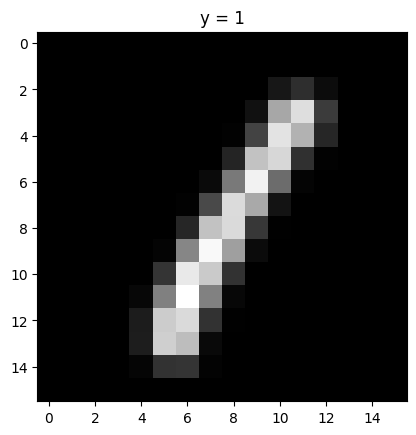

In [9]:
def show_data(data_sample):
    plt.imshow(data_sample[0].numpy().reshape(IMAGE_SIZE, IMAGE_SIZE), cmap='gray')
    plt.title('y = '+ str(data_sample[1]))
# The image for the fourth data element
show_data(train_dataset[3])


In [11]:
class CNN(nn.Module):

  #Constructor
  def __init__(self, out_1 = 16, out_2 = 32):
    super(CNN, self).__init__()
    self.cnn1 = nn.Conv2d(in_channels = 1, out_channels = out_1, kernel_size = 5, stride = 1, padding = 2)
    self.maxpool1 = nn.MaxPool2d(kernel_size = 2)

    self.cnn2 = nn.Conv2d(in_channels = out_1, out_channels = out_2, kernel_size = 5, stride = 1, padding = 2)
    self.maxpool2 = nn.MaxPool2d(kernel_size = 2)
    self.fc1 = nn.Linear(out_2 * 4 * 4, 10)

  def forward(self, x):
    x = self.cnn1(x)
    x = torch.relu(x)
    x = self.maxpool1(x)
    x = self.cnn2(x)
    x = torch.relu(x)
    x = self.maxpool2(x)
    x = x.reshape(x.size(0), -1)
    x = self.fc1(x)
    return x

  def activations(self, x):
    z1 = self.cnn1(x)
    a1 = torch.relu(z1)
    out_1 = self.maxpool1(a1)
    z2 = self.cnn2(out_1)
    a2 = torch.relu(z2)
    out_2 = self.maxpool2(a2)
    out = self.fc1(out_2.reshape(out_2.size(0), -1))
    return z1, a1, out_1, z2, a2, out_2, out


In [12]:
model_cnn = CNN(out_1 = 16, out_2 = 32)

In [14]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_cnn.parameters(), lr = 0.001)
train_loader = torch.utils.data.DataLoader(dataset = train_dataset, batch_size = 100)
test_loader = torch.utils.data.DataLoader(dataset = test_dataset, batch_size = 100)

In [15]:
n_epochs = 5
cost_lists = []
accuracy_lists = []
num_test = len(test_dataset)
num_train = len(train_dataset)
COST = 0

In [16]:
def train_model(epochs):
  for epoch in range(epochs):
    COST = 0
    for x, y in train_loader:
      yhat = model_cnn(x)
      loss = criterion(yhat, y)
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
      COST += loss.item()

    cost_lists.append(COST)
    correct = 0
    for x, y in test_loader:
      z = model_cnn(x)
      _, yhat = torch.max(z.data, 1)
      correct += (yhat == y).sum().item()
    accuracy = correct / num_test
    accuracy_lists.append(accuracy)

In [17]:
train_model(n_epochs)

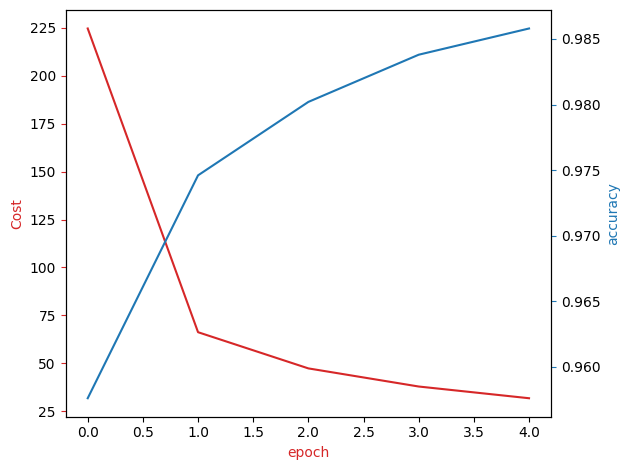

In [19]:
# Plot the loss and accuracy

fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.plot(cost_lists, color=color)
ax1.set_xlabel('epoch', color=color)
ax1.set_ylabel('Cost', color=color)
ax1.tick_params(axis='y', color=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('accuracy', color=color)
ax2.set_xlabel('epoch', color=color)
ax2.plot( accuracy_lists, color=color)
ax2.tick_params(axis='y', color=color)
fig.tight_layout()